# 13.6 Lab

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=971f6c866390f5a3253979fbee1f2ff97a8ad3e02e099cb370be6dbb12e35dd1
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data

In [3]:
from scipy.stats import \
(ttest_1samp,
ttest_rel,
ttest_ind,
t as t_dbn)
from statsmodels.stats.multicomp import \
pairwise_tukeyhsd
from statsmodels.stats.multitest import \
multipletests as mult_test

## 13.6.1 Review of Hypothesis Testing

In [4]:
rng = np.random.default_rng(12)
X = rng.standard_normal((10, 100))
true_mean = np.array([0.5]*50 + [0]*50)
X += true_mean[None,:]

In [5]:
result = ttest_1samp(X[:,0], 0)
result.pvalue

0.9307442156164141

In [22]:
p_values = np.empty(100)
for i in range(100):
  p_values[i] = ttest_1samp(X[:,i], 0).pvalue
decision = pd.cut(p_values, bins = [0, 0.05,1], labels = ['Reject H0', 'Do not reject H0'])
truth = pd.Categorical(true_mean == 0, categories = [True, False], ordered = True)

In [23]:
truth


[False, False, False, False, False, ..., True, True, True, True, True]
Length: 100
Categories (2, bool): [True < False]

In [24]:
pd.crosstab(decision, truth)

col_0,True,False
row_0,,
Reject H0,5,15
Do not reject H0,45,35


In [25]:
pd.crosstab(decision, truth, rownames=['Decision'], colnames=['H0'])

H0,True,False
Decision,,
Reject H0,5,15
Do not reject H0,45,35


In [26]:
true_mean = np.array([1]*50 + [0]*50)
X = rng.standard_normal((10, 100))
X += true_mean[None,:]
for i in range(100):
  p_values[i] = ttest_1samp(X[:,i], 0).pvalue
decision = pd.cut(p_values, [0, 0.05, 1],labels=['Reject H0','Do not reject H0'])
truth = pd.Categorical(true_mean == 0, categories=[True, False],ordered=True)
pd.crosstab(decision, truth, rownames=['Decision'], colnames=['H0'])

H0,True,False
Decision,,
Reject H0,2,40
Do not reject H0,48,10


## 13.6.2 Family Wise Error Rate

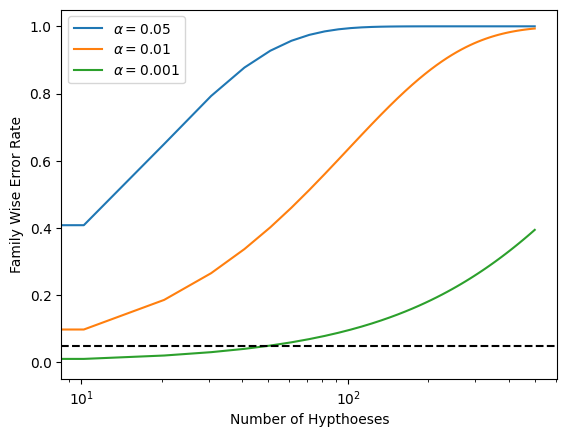

In [27]:
m = np.linspace(0, 501)
plt, ax= plt.subplots()
[ax.plot(m,1 - (1 - alpha)**m, label=r'$\alpha=%s$' % str(alpha)) for alpha in [0.05, 0.01, 0.001]]
ax.set_xscale('log')
ax.set_xlabel('Number of Hypthoeses')
ax.set_ylabel('Family Wise Error Rate')
ax.legend()
ax.axhline(0.05, c='k', ls='--');

In [29]:
Fund = load_data('Fund')
fund_mini = Fund.iloc[:,0:5]
fund_mini_pvals = np.empty(5)
for i in range(5):
  fund_mini_pvals[i] = ttest_1samp(fund_mini.iloc[:,i], 0).pvalue
fund_mini_pvals

array([0.00620236, 0.91827115, 0.01160098, 0.6005396 , 0.75578151])

In [30]:
reject, bonf = mult_test(fund_mini_pvals, method ='bonferroni')[:2]
reject, bonf

(array([ True, False, False, False, False]),
 array([0.03101178, 1.        , 0.05800491, 1.        , 1.        ]))

In [31]:
mult_test(fund_mini_pvals, method = 'holm')[:2]

(array([ True, False,  True, False, False]),
 array([0.03101178, 1.        , 0.04640393, 1.        , 1.        ]))

In [32]:
#Different from Bonferroni since we reject $H_{03}$ here

In [34]:
fund_mini.mean()

,0
Manager1,3.0
Manager2,-0.1
Manager3,2.8
Manager4,0.5
Manager5,0.3


In [35]:
ttest_rel(fund_mini.iloc[:,0], fund_mini.iloc[:,1]).pvalue

0.038391072368079586

In [36]:
returns = np.hstack([fund_mini.iloc[:,i] for i in range(5)])
managers = np.hstack([[i+1]*50 for i in range(5)])
tukey = pairwise_tukeyhsd(returns, managers)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-3.1,0.1862,-6.9865,0.7865,False
1,3,-0.2,0.9999,-4.0865,3.6865,False
1,4,-2.5,0.3948,-6.3865,1.3865,False
1,5,-2.7,0.3152,-6.5865,1.1865,False
2,3,2.9,0.2453,-0.9865,6.7865,False
2,4,0.6,0.9932,-3.2865,4.4865,False
2,5,0.4,0.9986,-3.4865,4.2865,False
3,4,-2.3,0.482,-6.1865,1.5865,False
3,5,-2.5,0.3948,-6.3865,1.3865,False
4,5,-0.2,0.9999,-4.0865,3.6865,False


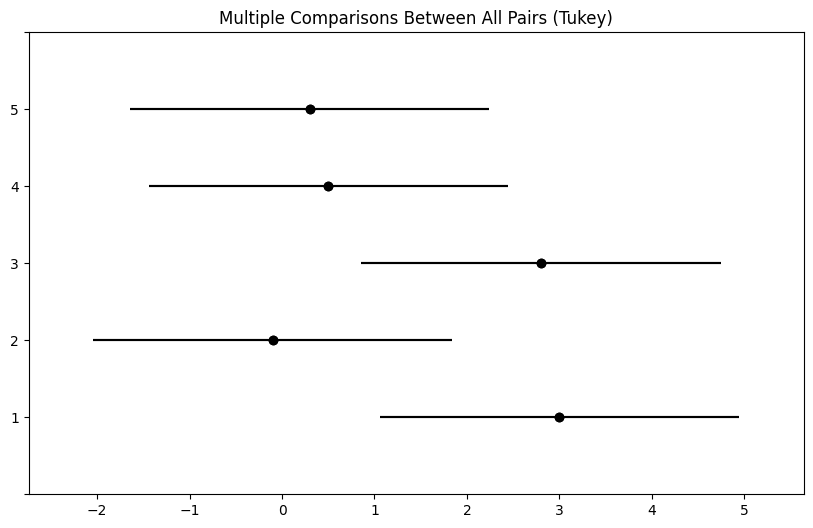

In [50]:

tukey.plot_simultaneous(ax=ax)

## 13.6.3 False Discovery Rate

In [51]:
fund_pvalues = np.empty(2000)
for i, manager in enumerate(Fund.columns):
  fund_pvalues[i]= ttest_1samp(Fund[manager],0).pvalue

In [52]:
fund_qvalues = mult_test(fund_pvalues, method = 'fdr_bh')[1]

In [53]:
fund_qvalues[:10]

array([0.08988921, 0.991491  , 0.12211561, 0.92342997, 0.95603587,
       0.07513802, 0.0767015 , 0.07513802, 0.07513802, 0.07513802])

In [54]:
(fund_qvalues <= 0.10).sum()

146

In [55]:
(fund_pvalues <= 0.1/2000).sum()

0

In [86]:
sorted_ = np.sort(fund_pvalues)
m = fund_pvalues.shape[0]
q = 0.1
sorted_set_ = np.where(sorted_ < q * np.linspace(1, m, m) / m)[0]
if sorted_set_.shape[0] > 0:
  selected_ = fund_pvalues < sorted_[sorted_set_].max()
  print(selected_, sorted_set_, sorted_set_.max())
  sorted_set_ = np.arange(sorted_set_.max())
else:
  selected_ = []
  sorted_set_ = []

[ True False False ... False False False] [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145] 145


In [88]:
fund_pvalues.shape

(2000,)

In [70]:
(selected_ == True).sum()

145

In [73]:
sorted_.shape

(2000,)

In [58]:
sorted_set_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144])

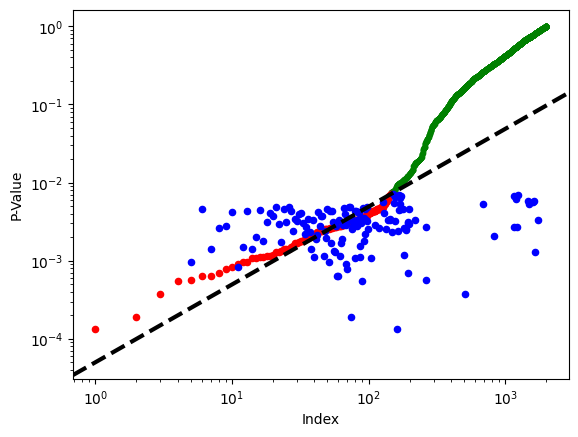

In [87]:
fig, ax = plt.subplots()
ax.scatter(np.arange(0, sorted_.shape[0]) + 1, sorted_, s=10, c ='g')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('P-Value')
ax.set_xlabel('Index')
ax.scatter(sorted_set_+1, sorted_[sorted_set_], c='r', s=20)
# The following line has been changed to ensure that x and y have the same size.
ax.scatter(np.arange(0, sorted_.shape[0])[selected_ == True], fund_pvalues[selected_ == True], c='b', s=20)
ax.axline((0, 0), (1,q/m), c='k', ls='--', linewidth=3);

In [85]:
np.arange(0, sorted_.shape[0])[selected_ == True], sorted_[selected_ == True]


(array([   0,    5,    6,    7,    8,    9,   10,   11,   12,   13,   14,
          15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,
          26,   27,   28,   29,   30,   31,   32,   33,   34,   35,   36,
          37,   38,   39,   40,   41,   42,   43,   44,   45,   46,   47,
          48,   49,   50,   51,   52,   53,   54,   55,   56,   57,   58,
          59,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
          70,   71,   72,   73,   74,   75,   76,   77,   78,   79,   80,
          81,   82,   83,   84,   85,   86,   87,   88,   89,   90,   91,
          92,   93,   94,   95,   96,   97,   98,   99,  105,  111,  120,
         127,  129,  134,  140,  143,  144,  149,  152,  154,  155,  157,
         161,  164,  166,  168,  170,  171,  172,  173,  179,  181,  182,
         188,  189,  193,  194,  196,  198,  199,  220,  262,  263,  507,
         691,  836, 1158, 1167, 1202, 1216, 1234, 1483, 1490, 1601, 1624,
        1664, 1747]),
 array([1.330658

## 13.6.4 ReSampling Approach



In [89]:
Khan = load_data('Khan')
D = pd.concat([Khan['xtrain'], Khan['xtest']])
D['Y'] = pd.concat([Khan['ytrain'], Khan['ytest']])
D['Y'].value_counts()

,count
Y,
2,29
4,25
3,18
1,11


In [90]:
D2 = D[lambda df:df['Y'] == 2]
D4 = D[lambda df:df['Y'] == 4]
gene_11 = 'G0011'
observedT, pvalue = ttest_ind(D2[gene_11], D4[gene_11], equal_var=True)
observedT, pvalue

(-2.0936330736768185, 0.04118643782678394)

In [91]:
B = 10000
Tnull = np.empty(B)
D_ = np.hstack([D2[gene_11], D4[gene_11]])
n_ = D2[gene_11].shape[0]
D_null = D_.copy()
for b in range(B):
  rng.shuffle(D_null)
  ttest_ = ttest_ind(D_null[:n_], D_null[n_:],equal_var=True)
  Tnull[b] = ttest_.statistic
(np.abs(Tnull) > np.abs(observedT)).mean()

0.0398

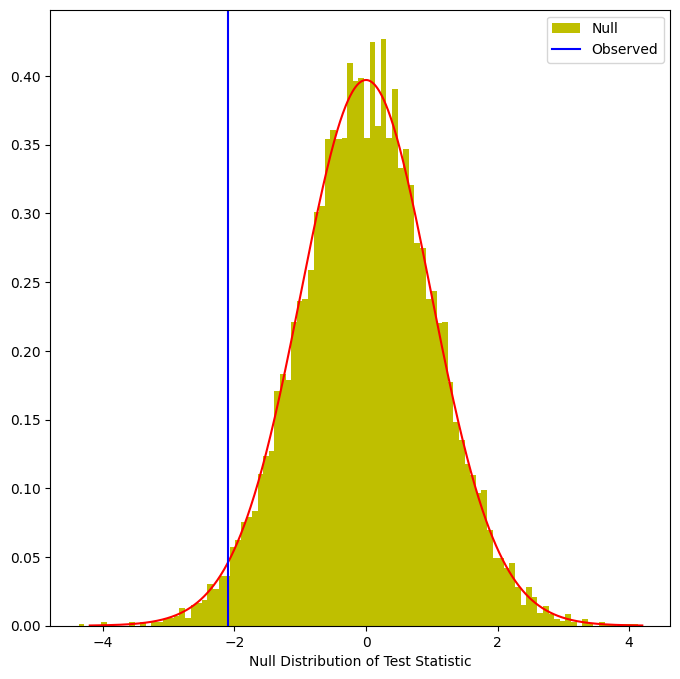

In [92]:
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(Tnull, bins=100, density=True, facecolor='y',label='Null')
xval = np.linspace(-4.2, 4.2, 1001)
ax.plot(xval, t_dbn.pdf(xval, D_.shape[0]-2), c='r')
ax.axvline(observedT, c='b', label='Observed')
ax.legend()
ax.set_xlabel("Null Distribution of Test Statistic");

In [93]:
m, B = 100, 10000
idx = rng.choice(Khan['xtest'].columns, m, replace=False)
T_vals = np.empty(m)
Tnull_vals = np.empty((m, B))
for j in range(m):
  col = idx[j]
  T_vals[j] = ttest_ind(D2[col],D4[col], equal_var=True).statistic
  D_ = np.hstack([D2[col], D4[col]])
  D_null = D_.copy()
  for b in range(B):
    rng.shuffle(D_null)
    ttest_ = ttest_ind(D_null[:n_],D_null[n_:],equal_var=True)
    Tnull_vals[j,b] = ttest_.statistic

In [94]:
cutoffs = np.sort(np.abs(T_vals))
FDRs, Rs, Vs = np.empty((3, m))
for j in range(m):
  R = np.sum(np.abs(T_vals) >= cutoffs[j])
  V = np.sum(np.abs(Tnull_vals) >= cutoffs[j]) / B
  Rs[j] = R
  Vs[j] = V
  FDRs[j] = V / R

In [95]:
sorted(idx[np.abs(T_vals) >= cutoffs[FDRs < 0.1].min()])

['G0097',
 'G0129',
 'G0182',
 'G0714',
 'G0812',
 'G0941',
 'G0982',
 'G1020',
 'G1022',
 'G1090',
 'G1320',
 'G1634',
 'G1697',
 'G1853',
 'G1854',
 'G1994',
 'G2017',
 'G2115',
 'G2193']

In [96]:
sorted(idx[np.abs(T_vals) >= cutoffs[FDRs < 0.2].min()])

['G0097',
 'G0129',
 'G0158',
 'G0182',
 'G0242',
 'G0552',
 'G0679',
 'G0714',
 'G0751',
 'G0812',
 'G0908',
 'G0941',
 'G0982',
 'G1020',
 'G1022',
 'G1090',
 'G1240',
 'G1244',
 'G1320',
 'G1381',
 'G1514',
 'G1634',
 'G1697',
 'G1768',
 'G1853',
 'G1854',
 'G1907',
 'G1994',
 'G2017',
 'G2115',
 'G2193']

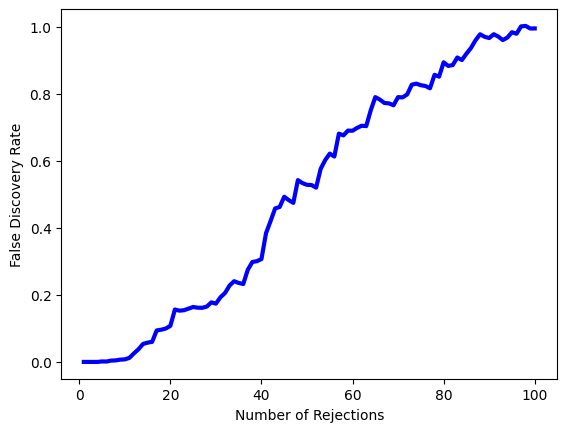

In [97]:
fig, ax = plt.subplots()
ax.plot(Rs, FDRs, 'b', linewidth=3)
ax.set_xlabel("Number of Rejections")
ax.set_ylabel("False Discovery Rate");